In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
display(df.head())
print(df.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)


In [3]:
number = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
           'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
           'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
           'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
print(len(number))

34


# Question 2

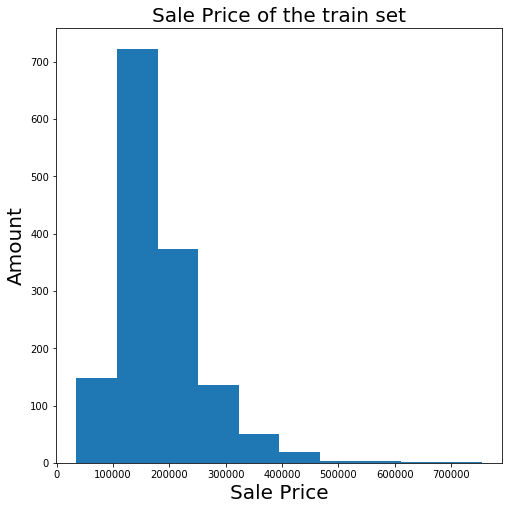

In [4]:
plt.figure(figsize=(8,8))
plt.hist(df['SalePrice'])
plt.xlabel('Sale Price',fontsize = 20)
plt.ylabel('Amount', fontsize = 20)
plt.title('Sale Price of the train set', fontsize = 20)
plt.show()

# Question 3

/Users/stephentang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/stephentang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/stephentang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

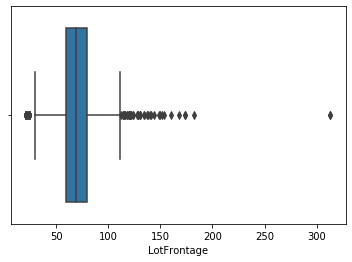

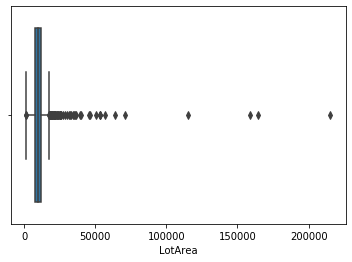

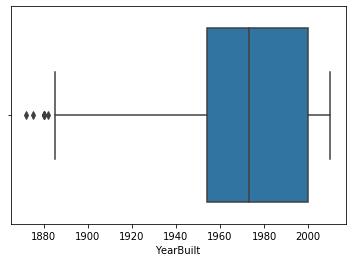

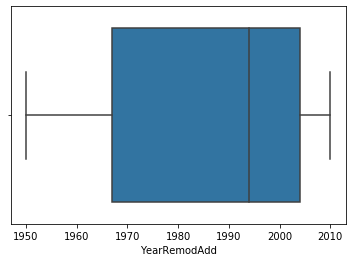

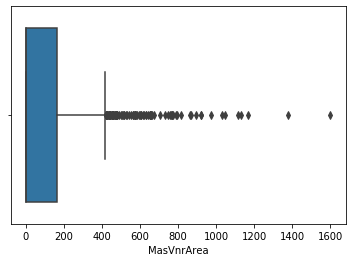

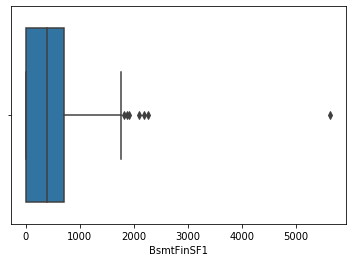

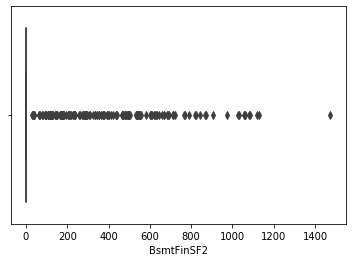

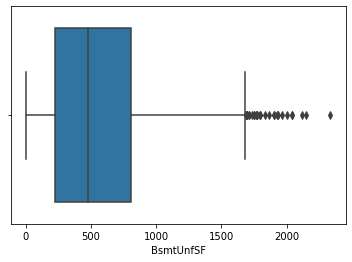

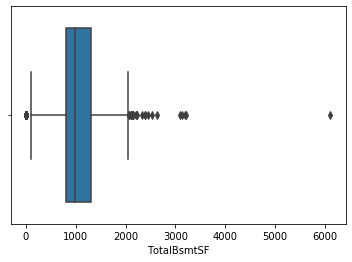

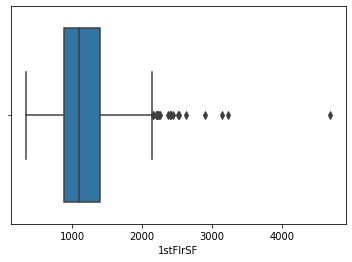

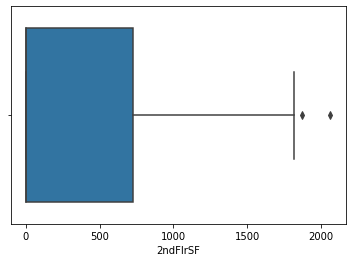

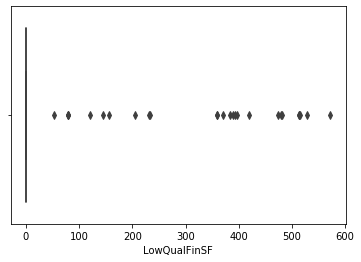

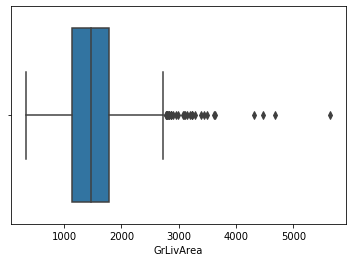

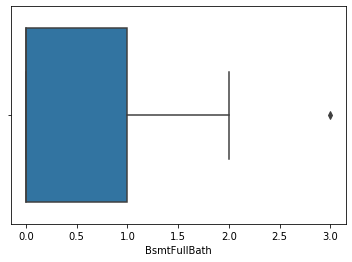

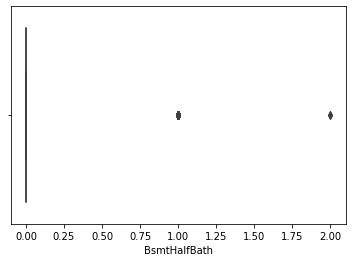

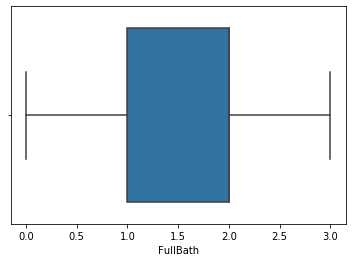

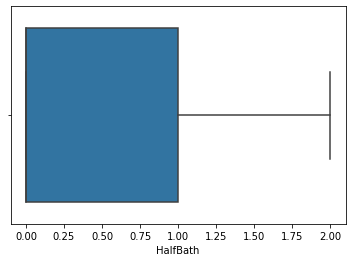

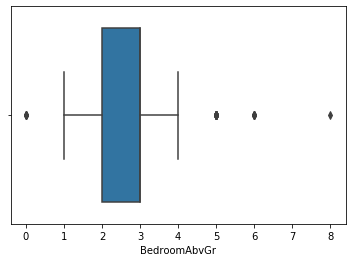

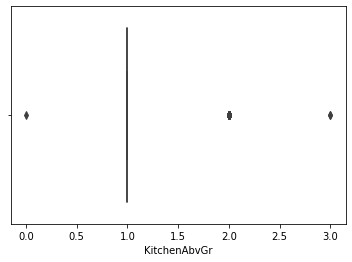

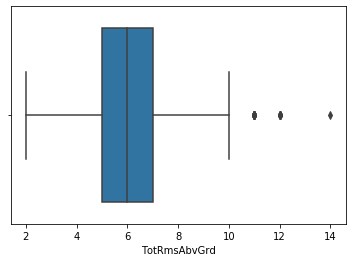

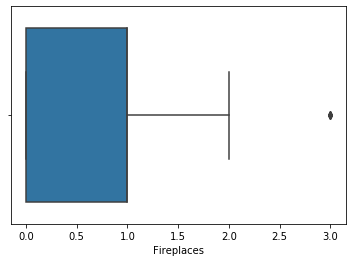

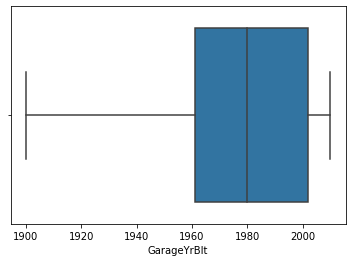

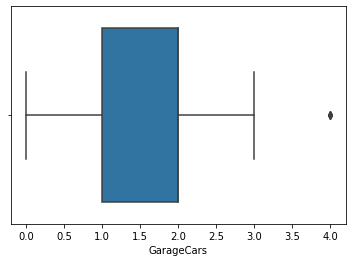

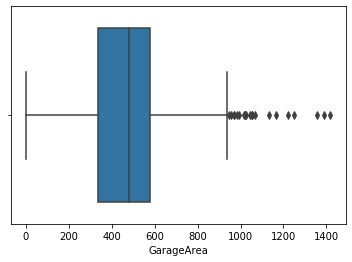

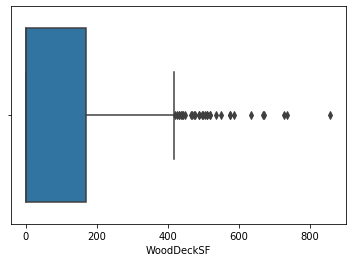

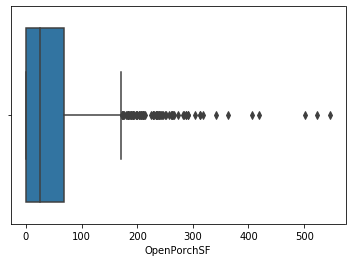

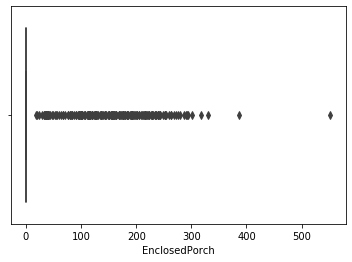

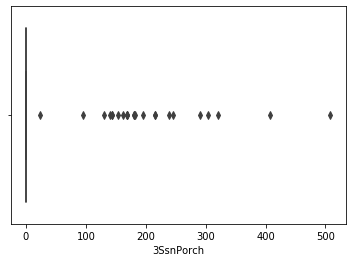

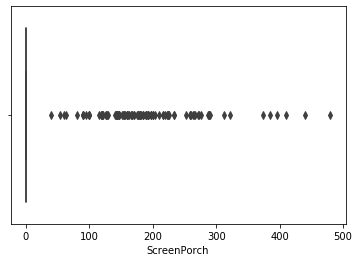

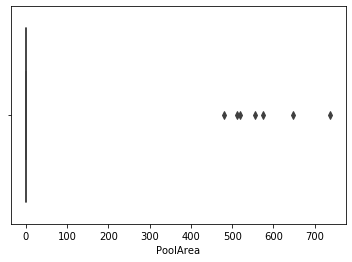

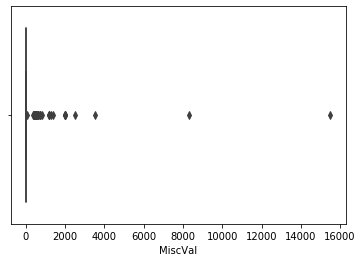

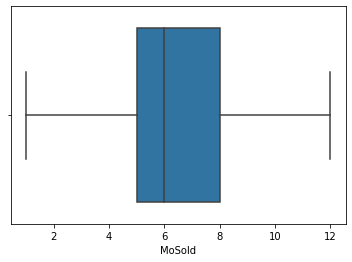

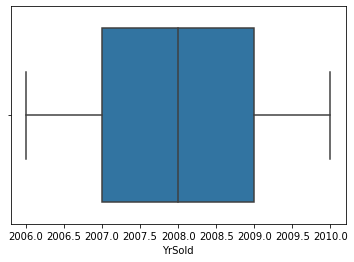

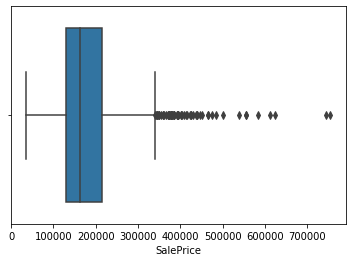

In [5]:
for num in number:
    plt.figure()
    sns.boxplot(df[num])

# Question 4

In [6]:
new_df1 = df[number]
Q1 = new_df1.quantile(.25)
Q3 = new_df1.quantile(.75)
IQR = Q3 - Q1
test1 = new_df1 < (Q1 - 1.5 * IQR)
test2 = new_df1 > (Q3 + 1.5 * IQR)
index_to_be_dropped = new_df1[(test1 | test2).any(axis=1)].index
new_df1 = new_df1.drop(index_to_be_dropped, axis=0)
x, _ = np.shape(df)
a, _ = np.shape(new_df1)
number_of_rows_removed = x - a
print(number_of_rows_removed)

841


In [7]:
display(new_df1)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000
6,75.0,10084,2004,2005,186.0,1369,0,317,1686,1694,...,255,57,0,0,0,0,0,8,2007,307000
10,70.0,11200,1965,1965,0.0,906,0,134,1040,1040,...,0,0,0,0,0,0,0,2,2008,129500
13,91.0,10652,2006,2007,306.0,0,0,1494,1494,1494,...,160,33,0,0,0,0,0,8,2007,279500
15,51.0,6120,1929,2001,0.0,0,0,832,832,854,...,48,112,0,0,0,0,0,7,2007,132000
18,66.0,13695,2004,2004,0.0,646,0,468,1114,1114,...,0,102,0,0,0,0,0,6,2008,159000
19,70.0,7560,1958,1965,0.0,504,0,525,1029,1339,...,0,0,0,0,0,0,0,5,2009,139000
20,101.0,14215,2005,2006,380.0,0,0,1158,1158,1158,...,240,154,0,0,0,0,0,11,2006,325300


In [8]:
print(new_df1.shape)

(619, 34)


/Users/stephentang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/stephentang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/stephentang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

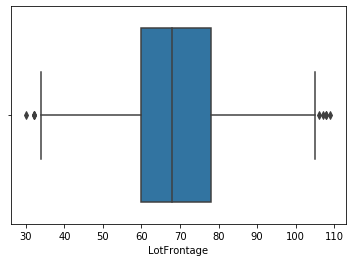

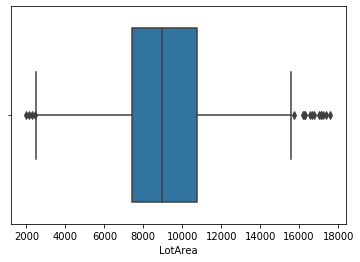

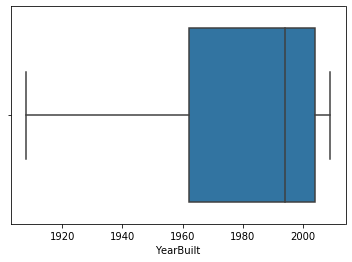

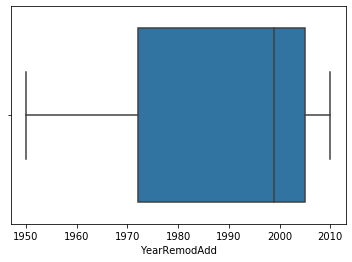

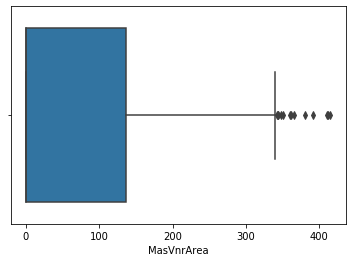

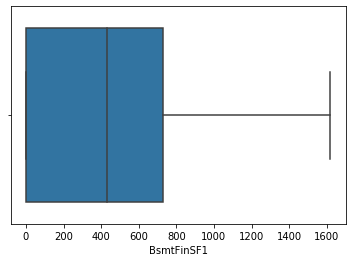

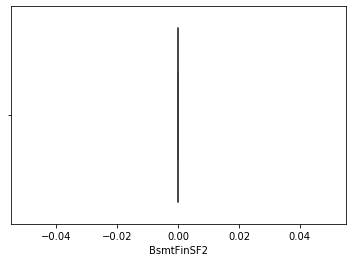

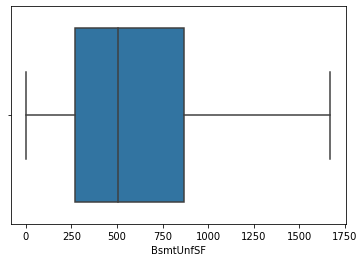

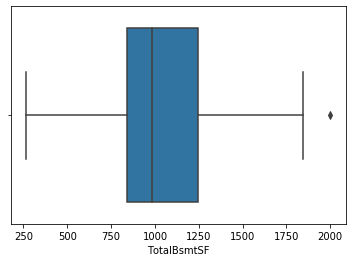

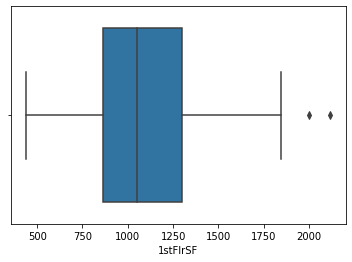

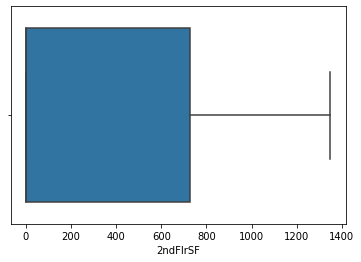

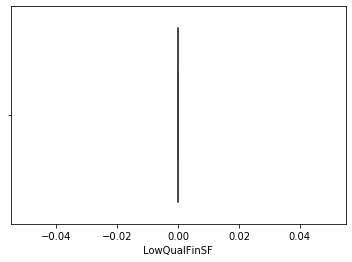

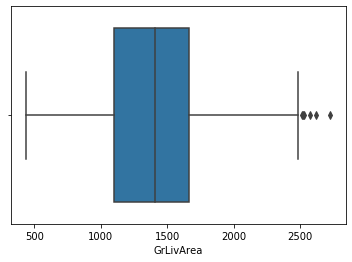

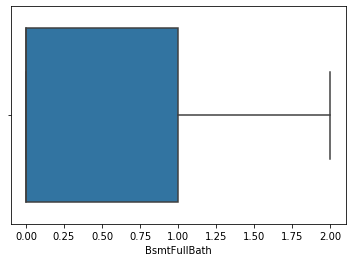

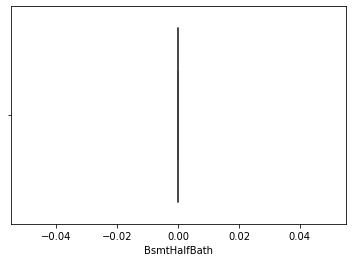

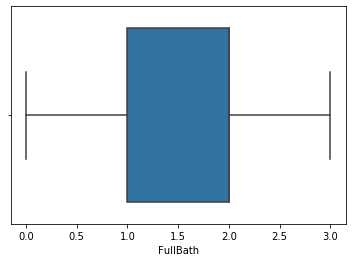

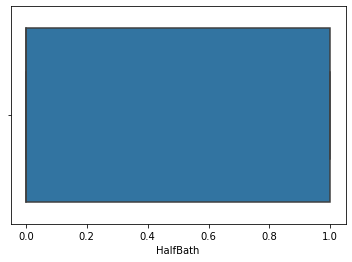

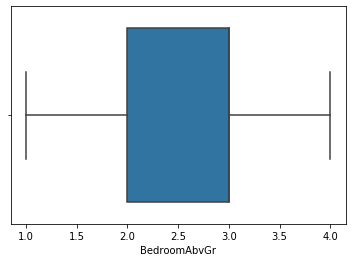

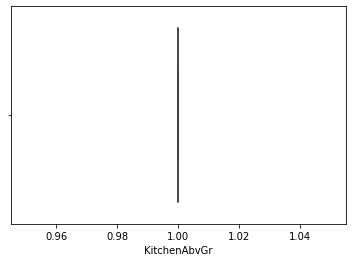

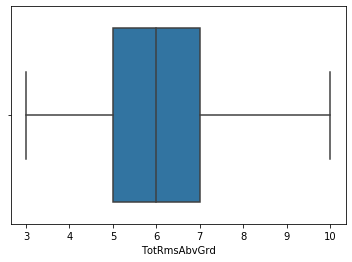

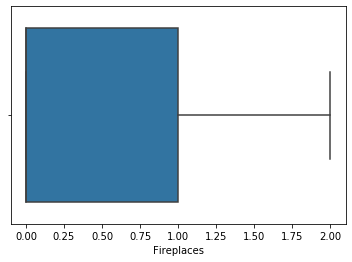

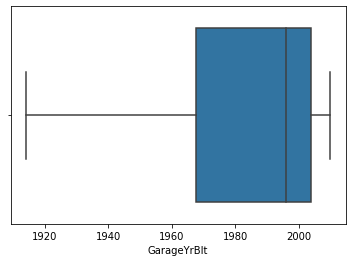

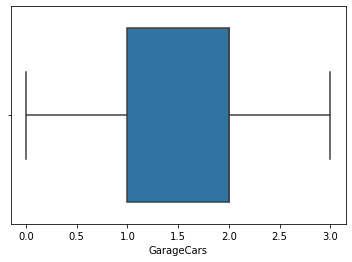

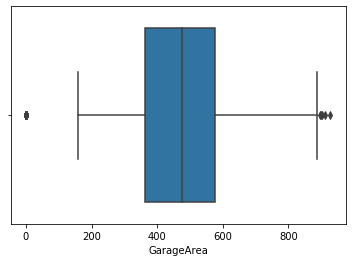

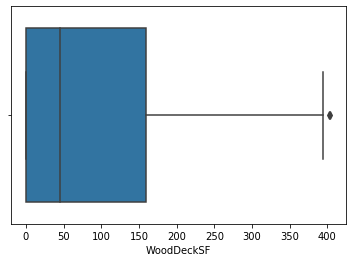

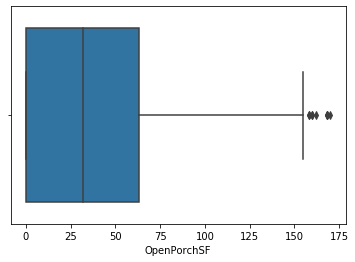

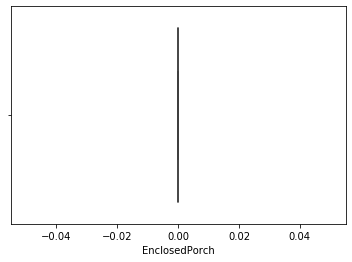

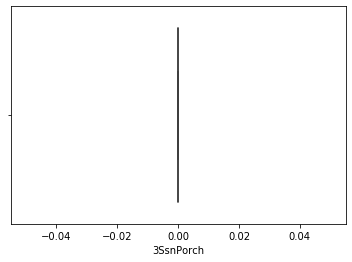

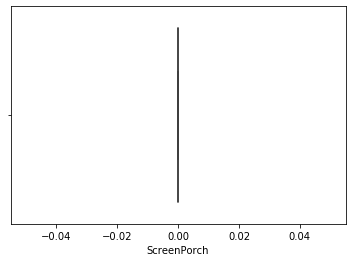

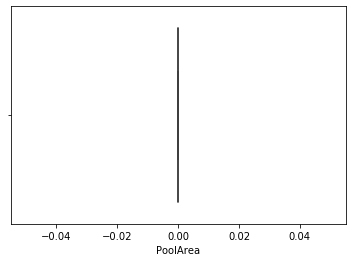

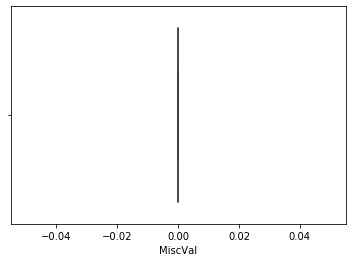

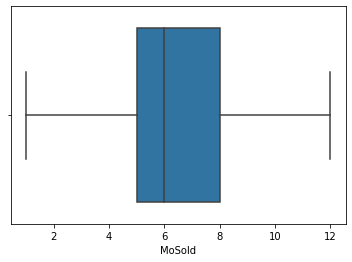

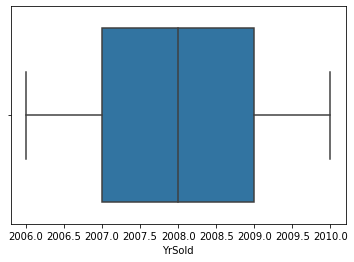

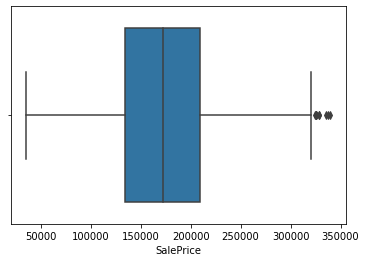

In [9]:
for x in number:
    plt.figure()
    sns.boxplot(new_df1[x])

# Question 5

In [10]:
drop_col = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
           'KitchenAbvGr', 'BsmtHalfBath']
for column in drop_col:
    del new_df1[column]

In [11]:
print(new_df1.shape)

(619, 25)


# Question 6

In [12]:
new_col = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
           'FullBath','HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
           'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']
for column in new_col:
    cor_mat = np.corrcoef(df[column], df['BsmtFinSF1'])
    print('The correlated coefficient of '+ column +' and BsmtFinSF1 is '+  str(cor_mat[0,1])+'.')

The correlated coefficient of LotFrontage and BsmtFinSF1 is nan.
The correlated coefficient of LotArea and BsmtFinSF1 is 0.21410313070557696.
The correlated coefficient of YearBuilt and BsmtFinSF1 is 0.2495031966847975.
The correlated coefficient of YearRemodAdd and BsmtFinSF1 is 0.1284505471282888.
The correlated coefficient of MasVnrArea and BsmtFinSF1 is nan.
The correlated coefficient of BsmtFinSF1 and BsmtFinSF1 is 1.0.
The correlated coefficient of BsmtUnfSF and BsmtFinSF1 is -0.4952514692570121.
The correlated coefficient of TotalBsmtSF and BsmtFinSF1 is 0.5223960519923857.
The correlated coefficient of 1stFlrSF and BsmtFinSF1 is 0.44586265609200504.
The correlated coefficient of 2ndFlrSF and BsmtFinSF1 is -0.13707898608005353.
The correlated coefficient of GrLivArea and BsmtFinSF1 is 0.20817113014532684.
The correlated coefficient of BsmtFullBath and BsmtFinSF1 is 0.6492117535742649.
The correlated coefficient of FullBath and BsmtFinSF1 is 0.05854313686159519.
The correlated co

BsmtFullBath 0.6492117535742649
TotalBsmtSF 0.5223960519923857
1stFlrSF 0.44586265609200504
BsmtUnfSF -0.4952514692570121
GarageArea 0.29697038534451303


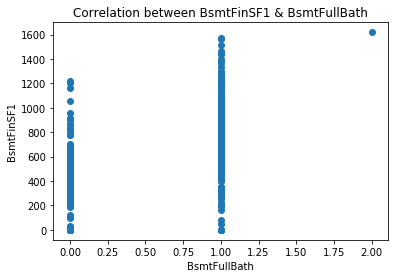

In [13]:
plt.figure()
plt.scatter(new_df1['BsmtFullBath'], new_df1['BsmtFinSF1'])
plt.xlabel('BsmtFullBath')
plt.ylabel('BsmtFinSF1')
plt.title('Correlation between BsmtFinSF1 & BsmtFullBath')
plt.show()

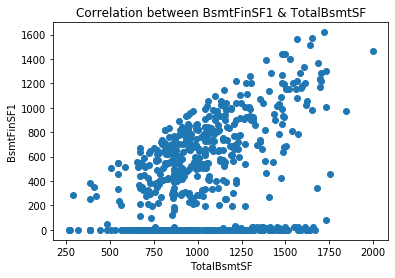

In [14]:
plt.figure()
plt.scatter(new_df1['TotalBsmtSF'], new_df1['BsmtFinSF1'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('BsmtFinSF1')
plt.title('Correlation between BsmtFinSF1 & TotalBsmtSF')
plt.show()

In [15]:
drop = ['TotalBsmtSF','BsmtFullBath']
for num in drop:
    del new_df1[num]
print(new_df1.shape)

(619, 23)


# Question 7

In [16]:
att_drop = ['Alley','BldgType','GarageCond']
for num in att_drop:
    del df[num]
print(df.shape)

(1460, 78)


# Question 8

In [17]:
new_col = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
           'BsmtUnfSF', '1stFlrSF', 'GrLivArea',
           'FullBath','HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
           'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']
for col in new_col:
    mean = new_df1[col].mean()
    print(mean)
    new_df1 = new_df1.fillna({col : mean})
print(new_df1)

67.546
9029.256865912763
1981.421647819063
1989.1211631663973
72.82247557003258
436.5525040387722
603.096930533118
1099.6720516962844
1411.5266558966075
1.5783521809369951
0.3861066235864297
2.7722132471728593
6.24232633279483
0.518578352180937
1985.1099830795263
1.7867528271405493
469.5831987075929
86.58158319870759
40.508885298869146
6.345718901453958
2007.7883683360258
175708.5379644588
      LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0          65.000     8450       2003          2003       196.0         706   
2          68.000    11250       2001          2002       162.0         486   
4          84.000    14260       2000          2000       350.0         655   
6          75.000    10084       2004          2005       186.0        1369   
10         70.000    11200       1965          1965         0.0         906   
13         91.000    10652       2006          2007       306.0           0   
15         51.000     6120       1929          2001   

In [18]:
print(new_df1.isna().sum())

LotFrontage     0
LotArea         0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64


# Question 9

In [19]:
df['MasVnrType'].value_counts()  #before fillin none with BrkFace

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [20]:
df[df['MasVnrType'] == 'None'] = np.nan
df['MasVnrType'] = df['MasVnrType'].fillna('BrkFace')
print(df['MasVnrType'])

0       BrkFace
1       BrkFace
2       BrkFace
3       BrkFace
4       BrkFace
5       BrkFace
6         Stone
7         Stone
8       BrkFace
9       BrkFace
10      BrkFace
11        Stone
12      BrkFace
13        Stone
14      BrkFace
15      BrkFace
16      BrkFace
17      BrkFace
18      BrkFace
19      BrkFace
20      BrkFace
21      BrkFace
22      BrkFace
23      BrkFace
24      BrkFace
25        Stone
26      BrkFace
27        Stone
28      BrkFace
29      BrkFace
         ...   
1430    BrkFace
1431    BrkFace
1432    BrkFace
1433    BrkFace
1434    BrkFace
1435    BrkFace
1436    BrkFace
1437      Stone
1438    BrkFace
1439    BrkFace
1440    BrkFace
1441    BrkFace
1442      Stone
1443    BrkFace
1444    BrkFace
1445    BrkFace
1446    BrkFace
1447    BrkFace
1448    BrkFace
1449    BrkFace
1450    BrkFace
1451      Stone
1452    BrkFace
1453    BrkFace
1454    BrkFace
1455    BrkFace
1456      Stone
1457    BrkFace
1458    BrkFace
1459    BrkFace
Name: MasVnrType, Length

In [21]:
df['MasVnrType'].value_counts() #after fillin none with BrkFace

BrkFace    1317
Stone       128
BrkCmn       15
Name: MasVnrType, dtype: int64

In [22]:
print(df['MasVnrType'].isna().sum())

0


In [23]:
df['Electrical'].value_counts() #after fillin nan with SBrkr

SBrkr    578
FuseA     12
FuseF      6
Name: Electrical, dtype: int64

In [24]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')
print(df['Electrical'])

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
5       SBrkr
6       SBrkr
7       SBrkr
8       SBrkr
9       SBrkr
10      SBrkr
11      SBrkr
12      SBrkr
13      SBrkr
14      SBrkr
15      SBrkr
16      SBrkr
17      SBrkr
18      SBrkr
19      SBrkr
20      SBrkr
21      SBrkr
22      SBrkr
23      SBrkr
24      SBrkr
25      SBrkr
26      SBrkr
27      SBrkr
28      SBrkr
29      SBrkr
        ...  
1430    SBrkr
1431    SBrkr
1432    SBrkr
1433    SBrkr
1434    SBrkr
1435    SBrkr
1436    SBrkr
1437    SBrkr
1438    SBrkr
1439    SBrkr
1440    SBrkr
1441    SBrkr
1442    SBrkr
1443    SBrkr
1444    SBrkr
1445    SBrkr
1446    SBrkr
1447    SBrkr
1448    SBrkr
1449    SBrkr
1450    SBrkr
1451    SBrkr
1452    SBrkr
1453    SBrkr
1454    SBrkr
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    SBrkr
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object


In [25]:
df['Electrical'].value_counts() #after fillin nan with SBrkr

SBrkr    1442
FuseA      12
FuseF       6
Name: Electrical, dtype: int64

In [26]:
print(df['Electrical'].isna().sum())

0


# Question 10

In [27]:
arr_num = new_df1.to_numpy()
print(arr_num)

[[6.5000e+01 8.4500e+03 2.0030e+03 ... 2.0000e+00 2.0080e+03 2.0850e+05]
 [6.8000e+01 1.1250e+04 2.0010e+03 ... 9.0000e+00 2.0080e+03 2.2350e+05]
 [8.4000e+01 1.4260e+04 2.0000e+03 ... 1.2000e+01 2.0080e+03 2.5000e+05]
 ...
 [9.0000e+01 1.7217e+04 2.0060e+03 ... 7.0000e+00 2.0060e+03 8.4500e+04]
 [6.2000e+01 7.5000e+03 2.0040e+03 ... 1.0000e+01 2.0090e+03 1.8500e+05]
 [6.2000e+01 7.9170e+03 1.9990e+03 ... 8.0000e+00 2.0070e+03 1.7500e+05]]


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(arr_num)
scaled_data = scaler.transform(arr_num)
print(scaled_data)

[[-0.18146126 -0.20115518  0.8206433  ... -1.64499382  0.15866379
   0.5766432 ]
 [ 0.03235798  0.77118461  0.74458158 ...  1.00473042  0.15866379
   0.84042064]
 [ 1.17272727  1.81644988  0.70655072 ...  2.14032653  0.15866379
   1.30642746]
 ...
 [ 1.60036576  2.84331015  0.93473588 ...  0.24766636 -1.34076962
  -1.60391699]
 [-0.39528051 -0.53105618  0.85867416 ...  1.38326246  0.9083805
   0.16339187]
 [-0.39528051 -0.386247    0.66851986 ...  0.62619839 -0.59105291
  -0.01245976]]


In [29]:
new_df2 = pd.DataFrame(scaled_data)
display(new_df2.head())

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.181461,-0.201155,0.820643,0.699751,1.185919,0.665601,-1.081355,-0.833469,1.313304,0.746914,...,1.329658,-0.893447,0.792066,0.316023,0.416492,-0.877918,0.462909,-1.644994,0.158664,0.576643
1,0.032358,0.771185,0.744582,0.649333,0.858577,0.122147,-0.403564,-0.614560,1.342373,0.937100,...,-0.183317,0.829431,0.703517,0.316023,0.735167,-0.877918,0.033685,1.004730,0.158664,0.840421
2,1.172727,1.816450,0.706551,0.548495,2.668589,0.539619,-0.269916,0.155042,1.795366,1.968108,...,2.086146,0.829431,0.659243,1.797979,1.946134,1.068919,0.982495,2.140327,0.158664,1.306427
3,0.531270,0.366275,0.858674,0.800588,1.089642,2.303372,-0.682795,2.032871,-0.755443,0.706875,...,0.573171,0.829431,0.836340,0.316023,0.883883,1.707725,0.372546,0.626198,-0.591053,2.308782
4,0.174904,0.753821,-0.624529,-1.216155,-0.701115,1.159650,-1.119540,-0.204105,-0.755443,-0.929726,...,-0.939804,-0.893447,-0.890353,-1.165933,-0.454554,-0.877918,-0.915124,-1.644994,0.158664,-0.812585


In [30]:
print(new_df2.mean()) #mean of 0

0    -3.633783e-16
1    -9.470077e-17
2    -2.944333e-15
3     5.342702e-15
4     4.986139e-17
5    -3.587150e-17
6    -1.260883e-16
7    -1.077939e-16
8     2.977335e-17
9    -2.042882e-16
10   -2.833849e-17
11    5.739441e-18
12   -3.165660e-17
13    1.481493e-16
14    1.477906e-16
15   -1.956252e-15
16   -1.271645e-16
17    4.474970e-17
18   -2.582748e-17
19   -2.856156e-16
20   -1.504810e-16
21    5.918744e-14
22   -1.113110e-16
dtype: float64


In [31]:
print(new_df2.var()) #variance of 1

0     1.001618
1     1.001618
2     1.001618
3     1.001618
4     1.001618
5     1.001618
6     1.001618
7     1.001618
8     1.001618
9     1.001618
10    1.001618
11    1.001618
12    1.001618
13    1.001618
14    1.001618
15    1.001618
16    1.001618
17    1.001618
18    1.001618
19    1.001618
20    1.001618
21    1.001618
22    1.001618
dtype: float64


# Question 11

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scaled_data)

array([[ 2.04734928e+00,  9.99167412e-01, -7.89414409e-01, ...,
        -2.27422085e-01, -8.59491144e-02, -1.74073534e-15],
       [ 2.28658652e+00,  9.10326981e-01, -2.60291319e-01, ...,
        -1.31296242e-01, -4.10013053e-02, -8.95433397e-16],
       [ 5.63128392e+00,  1.67592318e+00,  1.89080333e+00, ...,
         1.81914871e-01, -1.14426721e-01, -7.59383222e-16],
       ...,
       [-1.84346997e+00,  1.03410405e+00, -3.04387281e-01, ...,
         8.66281357e-01, -1.94932518e-02, -1.33136136e-17],
       [ 1.76494213e-01, -1.96276101e+00, -1.46568772e+00, ...,
         2.26155673e-01,  1.85550616e-02, -3.16663678e-17],
       [ 1.37195685e+00,  1.13106055e+00, -2.09146830e+00, ...,
         1.86327130e-02, -1.45589546e-01,  9.80623739e-18]])

Text(0.5, 1.0, 'Number of component corresponding to explained variance ratio')

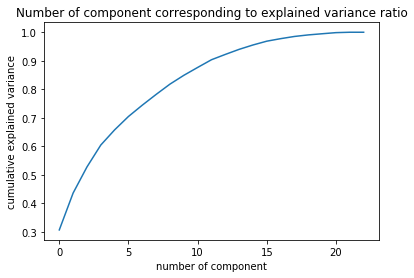

In [33]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of component')
plt.ylabel('cumulative explained variance')
plt.title('Number of component corresponding to explained variance ratio')

In [34]:
pca1 = PCA(0.9)
pca1.fit_transform(scaled_data)
print(pca1.n_components_)

12


In [35]:
pca = PCA(n_components=13)
pca_data = pca.fit_transform(scaled_data)
new_df3 = pd.DataFrame(pca_data)
display(new_df3.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.047349,0.999167,-0.789414,-2.245482,-1.143670,0.095179,0.584974,0.419919,-1.300689,-1.126366,0.978018,-0.149243,0.100700
1,2.286587,0.910327,-0.260291,-0.953016,0.287836,-0.653856,-0.185356,-0.442639,-0.756940,0.953621,0.548358,1.093864,0.628258
2,5.631284,1.675923,1.890803,-0.157270,0.914032,-1.092046,0.090713,-1.933324,-0.958290,-0.005721,-0.127951,-0.068814,1.066270
3,3.183385,-2.233933,2.698513,-0.479409,1.083842,-0.170715,0.391387,0.215519,1.032224,-0.449932,0.885168,-0.381347,-0.389838
4,-3.103101,0.296227,1.576676,-0.668436,-1.856734,-0.150238,0.151863,1.076403,0.180400,-0.297903,0.348259,-0.353553,0.182276


In [36]:
print(f'The proportion of explained variance is {pca.explained_variance_ratio_}')

The proportion of explained variance is [0.30620895 0.1294902  0.09151473 0.07692688 0.05324903 0.04696151
 0.03975466 0.03768185 0.03615772 0.03081547 0.02768365 0.02706398
 0.01865232]


In [41]:
print(new_df3.shape)

(619, 13)


In [42]:
print(new_df3.describe())

                 0             1             2             3             4   \
count  6.190000e+02  6.190000e+02  6.190000e+02  6.190000e+02  6.190000e+02   
mean   2.726234e-17  9.290719e-17 -5.667698e-17  2.618620e-17  5.380725e-18   
std    2.655975e+00  1.727164e+00  1.451980e+00  1.331233e+00  1.107569e+00   
min   -6.758376e+00 -4.044663e+00 -4.037449e+00 -2.708175e+00 -3.256738e+00   
25%   -2.186307e+00 -1.355214e+00 -1.034921e+00 -9.586052e-01 -8.167906e-01   
50%    2.791552e-01  1.853367e-01 -7.281518e-02 -7.787591e-02 -2.694419e-02   
75%    1.818148e+00  1.200873e+00  9.755101e-01  8.141243e-01  7.668494e-01   
max    7.791619e+00  5.684919e+00  4.862369e+00  3.720232e+00  3.327879e+00   

                 5             6             7             8             9   \
count  6.190000e+02  6.190000e+02  6.190000e+02  6.190000e+02  6.190000e+02   
mean  -4.869557e-17 -1.155062e-16 -2.017772e-17  1.614666e-16  1.086907e-16   
std    1.040126e+00  9.569936e-01  9.317107e-01  9.

# Question 12

In [39]:
new_df3.to_csv('numeric train.csv')
df.to_csv('categorical train.csv')